In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import os
import h5py

print(os.getpid())
%cd ../../

import pylib.mix as mix
import pylib.measurement as mse

6712
/media/work/docs/codes/QuCF/scripts-py


In [2]:
for i in range(30):
    plt.close()

Reading the file ../QuCF/tests/DirDec//dd_OUTPUT.hdf5...
Name of the simulation is dd
Simulation has been performed  03-29-2024 13:57:09
succ. prob.: 7.728e-02


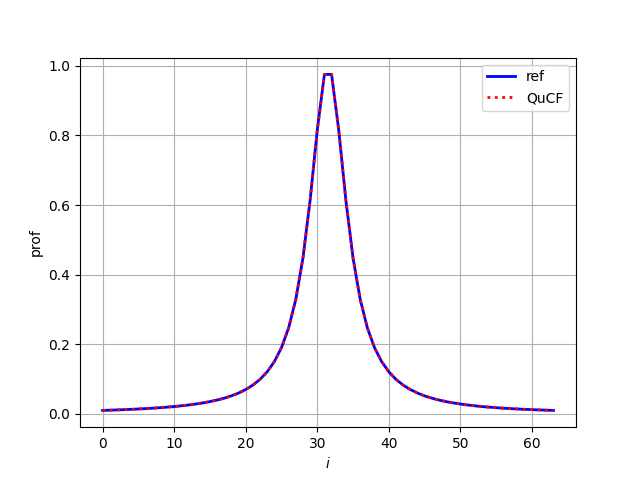

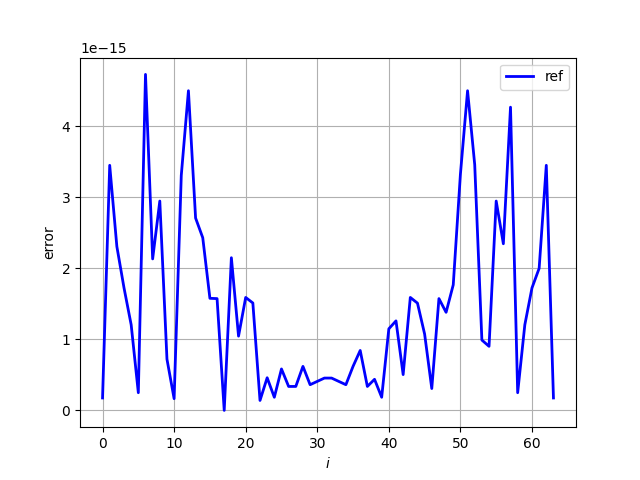

In [15]:
# ---------------------------------------------
# --- Test DirDec ---
# --------------------------------------------- 
mix.reload_module(mix)
mix.reload_module(mse)

nc = 6
N = 1 << nc
coef_H = 2**(nc/2.)

om = mse.MeasOracle__(True)
om.path_ = "../QuCF/tests/DirDec/"
om.pname_ = "dd"
om.open()
om.set_zero_ancillae_work_states(0)

# --- qucf signal ---
y_qc = om.get_var_x({"ry": 0}, "rx")
print("succ. prob.: {:0.3e}".format(
    np.sum(np.abs(y_qc)**2)
))
y_qc *= coef_H

# --- ref signal ---

# - linear -
y_ref = np.zeros(N)
# for ii in range(N):
#     y_ref[ii] = -0.5 + ii * (0.7 + 0.5) / (N-1)
for ii in range(N):
    k = -1.0 + 2./(N-1) * ii
    k *= 10.
    y_ref[ii] = 1./(1. + k*k)
# for ii in range(N):
#     k = -1.0 + 2./(N-1) * ii
#     k *= 10.
#     y_ref[ii] = np.sqrt(1./(1. + k*k))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(N), y_ref, '-b', linewidth = 2, label = "ref")
ax.plot(range(N), y_qc,      ':r', linewidth = 2, label = "QuCF")
plt.xlabel('$i$')
plt.ylabel("prof")
ax.legend()
plt.grid(True)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(N), np.abs(y_ref-y_qc)/np.abs(y_ref), '-b', linewidth = 2, label = "ref")
plt.xlabel('$i$')
plt.ylabel("error")
ax.legend()
plt.grid(True)
plt.show()

In [7]:
# ---------------------------------------------
# --- LCU test ---
# --------------------------------------------- 
mix.reload_module(mix)
mix.reload_module(mse)

nk = 4
Nk = 1 << nk
coef_H = 2**nk

om = mse.MeasOracle__(True)
om.path_ = "../QuCF/tests/DirDec/"
om.pname_ = "dd"
om.open()
om.set_zero_ancillae_work_states(0)

# --- QuCF signal ---
v_qc = om.get_var_x({}, "rx")[0]
v_qc *= coef_H

# --- ref signal ---
v_ref = 0.0
for ii in range(Nk):
    k = (-1.0 + 2./(Nk-1) * ii) * 10.
    wk = 1./(1. + k*k)

    Uk = -0.5 + ii * (0.7 + 0.5) / (Nk-1)

    v_ref += wk * Uk

# --- Printing ---
print("v-ref: {:0.3e}".format(v_ref))
print("v-lcu: {:0.3e}".format(v_qc.real))

Reading the file ../QuCF/tests/DirDec//dd_OUTPUT.hdf5...
Name of the simulation is dd
Simulation has been performed  04-01-2024 18:36:02
v-ref: 2.174e-01
v-lcu: 2.174e-01


In [5]:
5.436e-02 * 4

0.21744